# Sentiment Classifier

## Data Classes

In [1]:
import random

class Sentiment:
    NEGATIVE = "NEGATIVE"
    POSITIVE = "POSITIVE"

class Review:
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if (self.score <= 2):
            return Sentiment.NEGATIVE
        else:
            return Sentiment.POSITIVE
            
class ReviewContainer:
    def __init__(self, reviews):
        self.reviews = reviews
    
    def get_text(self):
        return [x.text for x in self.reviews]
    
    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]
        
    def evenly_distribute(self):
        negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews))
        positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews))
        min_num = min(len(positive), len(negative))
        negative = negative[:min_num]
        positive = positive[:min_num]
        self.reviews = negative + positive
        random.shuffle(self.reviews)
        
class TuningResult:
    def __init__(self, parameters, clf):
        for param in parameters.keys():
            print("Optimum value for %s: %s" % (param, clf.get_params()["estimator__" + param]))
        print("Test score: %f" % clf.score(x_test_vectors, y_test))
        print("F1 scores")
        f1_svm = f1_score(y_test, clf.predict(x_test_vectors), average = None, labels = [Sentiment.POSITIVE, Sentiment.NEGATIVE])
        print(" %s: %f\n %s: %f" % (Sentiment.POSITIVE, f1_svm[0], Sentiment.NEGATIVE, f1_svm[1]))
        pass

## Load Data

In [2]:
import json

file_name = "./data/sentiment/books_large.json"

reviews = []
with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review["reviewText"], review["overall"]))

## Prepare Data

In [3]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(reviews, test_size = 0.33, random_state = 42)

train_container = ReviewContainer(train)
test_container = ReviewContainer(test)

train_container.evenly_distribute()
test_container.evenly_distribute()

In [4]:
x_train = train_container.get_text()
y_train = train_container.get_sentiment()

x_test = test_container.get_text()
y_test = test_container.get_sentiment()

print("Number of positive: %d" % y_train.count(Sentiment.POSITIVE))
print("Number of negative: %d" % y_train.count(Sentiment.NEGATIVE))

Number of positive: 436
Number of negative: 436


### Bag of words vectorization

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer()
x_train_vectors = vectorizer.fit_transform(x_train)

x_test_vectors = vectorizer.transform(x_test)

`fit` will fit the a training set to a model

`transform` will do those operations on the set

`fit_transform` will first fit a model to a training set and then apply the transform to the model and return the transform

## Classification

### Linear SVM

In [6]:
from sklearn import svm

clf_svm = svm.SVC(kernel = "linear")
clf_svm.fit(x_train_vectors, y_train)

print(x_test[0])
print(clf_svm.predict(x_test_vectors[0])[0])

Not what I expected.  Barely touched on the subject.  Evidently, I was expecting more.  An okay book; not one that I would reccommend.
NEGATIVE


### Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

clf_dec = DecisionTreeClassifier()
clf_dec.fit(x_train_vectors, y_train)

print(x_test[0])
print(clf_svm.predict(x_test_vectors[0])[0])

Not what I expected.  Barely touched on the subject.  Evidently, I was expecting more.  An okay book; not one that I would reccommend.
NEGATIVE


### Naive Bayes

In [8]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()
clf_gnb.fit(x_train_vectors.toarray(), y_train)

print(x_test[0])
print(clf_svm.predict(x_test_vectors[0])[0])

Not what I expected.  Barely touched on the subject.  Evidently, I was expecting more.  An okay book; not one that I would reccommend.
NEGATIVE


### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(max_iter = 400)
clf_log.fit(x_train_vectors, y_train)

print(x_test[0])
print(clf_svm.predict(x_test_vectors[0])[0])

Not what I expected.  Barely touched on the subject.  Evidently, I was expecting more.  An okay book; not one that I would reccommend.
NEGATIVE


## Evaluation

### Accuracy

In [10]:
print("SVM: %f" % clf_svm.score(x_test_vectors, y_test))
print("Decision Tree: %f" % clf_dec.score(x_test_vectors, y_test))
print("Gaussian NB: %f" % clf_gnb.score(x_test_vectors.toarray(), y_test))
print("Logistic regression: %f\n" % clf_log.score(x_test_vectors, y_test))

SVM: 0.771635
Decision Tree: 0.608173
Gaussian NB: 0.639423
Logistic regression: 0.774038



### F1 Scores

In [11]:
from sklearn.metrics import f1_score

print("SVM          : %s" % str(f1_score(y_test, clf_svm.predict(x_test_vectors), average = None, labels = [Sentiment.POSITIVE, Sentiment.NEGATIVE])))
print("Decision Tree: %s" % str(f1_score(y_test, clf_dec.predict(x_test_vectors), average = None, labels = [Sentiment.POSITIVE, Sentiment.NEGATIVE])))
print("Gaussian NB  : %s" % str(f1_score(y_test, clf_gnb.predict(x_test_vectors.toarray()), average = None, labels = [Sentiment.POSITIVE, Sentiment.NEGATIVE])))
print("Logistic Reg : %s\n" % str(f1_score(y_test, clf_log.predict(x_test_vectors), average = None, labels = [Sentiment.POSITIVE, Sentiment.NEGATIVE])))

SVM          : [0.76658477 0.77647059]
Decision Tree: [0.60340633 0.6128266 ]
Gaussian NB  : [0.64454976 0.63414634]
Logistic Reg : [0.77294686 0.77511962]



### Custom training data

In [12]:
test_set = [
    "very good",
    "very bad",
    "not great",
    "nice product",
    "this is moderate"
]
new_test = vectorizer.transform(test_set)

print(clf_svm.predict(new_test))
print(clf_dec.predict(new_test))
print(clf_gnb.predict(new_test.toarray()))
print(clf_log.predict(new_test))

['POSITIVE' 'NEGATIVE' 'NEGATIVE' 'POSITIVE' 'POSITIVE']
['POSITIVE' 'POSITIVE' 'NEGATIVE' 'POSITIVE' 'POSITIVE']
['NEGATIVE' 'NEGATIVE' 'NEGATIVE' 'NEGATIVE' 'NEGATIVE']
['POSITIVE' 'NEGATIVE' 'NEGATIVE' 'POSITIVE' 'POSITIVE']


## Tuning Model (with Grid Search)

### SVM

In [13]:
from sklearn.model_selection import GridSearchCV

parameters_svm = {"kernel": ("linear", "rbf"), "C": [1, 4, 8, 16, 32]}

svc = svm.SVC()
clf_svm_opt = GridSearchCV(svc, parameters_svm, cv = 5)
clf_svm_opt.fit(x_train_vectors, y_train)

TuningResult(parameters_svm, clf_svm_opt)
print("")

Optimum value for kernel: rbf
Optimum value for C: 1.0
Test score: 0.790865
F1 scores
 POSITIVE: 0.793349
 NEGATIVE: 0.788321



### Logistic Regression

In [14]:
parameters_log = {"solver": ("newton-cg", "lbfgs", "saga"), "C": [0.1, 0.3, 1, 4, 8]}

log = LogisticRegression(n_jobs = 12, max_iter = 400)
clf_log_opt = GridSearchCV(log, parameters_log, cv = 5)
clf_log_opt.fit(x_train_vectors, y_train)

TuningResult(parameters_log, clf_log_opt)
print("")

Optimum value for solver: lbfgs
Optimum value for C: 1.0
Test score: 0.783654
F1 scores
 POSITIVE: 0.784689
 NEGATIVE: 0.782609



## Saving Model

### Saving model

In [15]:
import pickle

with open("./models/sentiment_classifier.pkl", "wb") as f:
    pickle.dump(clf_svm_opt, f)
    
with open('./models/sentiment_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

### Load Model

In [16]:
with open("./models/sentiment_classifier.pkl", "rb") as f:
    loaded_clf = pickle.load(f)

with open('./models/sentiment_vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)

In [17]:
print("STATEMENT: %s\n" % x_test[0])
print("SENTIMENT: %s" % loaded_clf.predict(x_test_vectors[0])[0])

STATEMENT: Not what I expected.  Barely touched on the subject.  Evidently, I was expecting more.  An okay book; not one that I would reccommend.

SENTIMENT: NEGATIVE


## Confusion Matrix

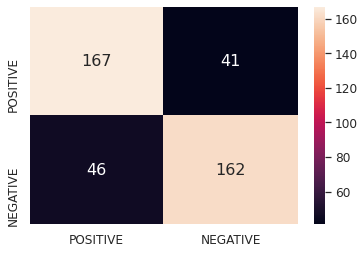

In [18]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

y_pred = loaded_clf.predict(x_test_vectors)

labels = [Sentiment.POSITIVE, Sentiment.NEGATIVE]

cm = confusion_matrix(y_test, y_pred, labels = labels)
df_cm = pd.DataFrame(cm, index = labels, columns = labels)

sn.set(font_scale = 1.1)
sn.heatmap(df_cm, annot = True, annot_kws = {"size": 16}, fmt = "d")
plt.show()